# HW3

## Prepare data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

In [2]:
train_data = pd.read_csv('train.csv')
train_data.count()

Date           2264
Open Price     2264
Close Price    2264
High Price     2264
Low Price      2264
Volume         2264
dtype: int64

In [3]:
close = train_data['Close Price']
rise = []
for index,row in train_data.iterrows():
    if index < len(train_data.index)-1:
        if close[index] < close[index+1]:
            rise.append(1)
        else:
            rise.append(0)
rise.append(0)
train_data['rise'] = rise
train_data = train_data.drop(['Date'], axis=1)
train_data.head()

,Open Price,Close Price,High Price,Low Price,Volume,rise
0,902.99,931.80,934.73,899.35,4048270080,0
1,929.17,927.45,936.63,919.53,5413910016,1
2,931.17,934.70,943.85,927.28,5392620032,0
3,927.45,906.65,927.45,902.37,4704940032,1
4,905.73,909.73,910.00,896.81,4991549952,0


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


In [5]:
close = test_data['Close Price']
rise = []
for index,row in test_data.iterrows():
    if index < len(test_data.index)-1:
        if close[index] < close[index+1]:
            rise.append(1)
        else:
            rise.append(0)
rise.append(0)
test_data['rise'] = rise
test_data = test_data.drop(['Date'],axis=1)
test_data.head()

,Open Price,Close Price,High Price,Low Price,Volume,rise
0,2683.73,2695.81,2695.89,2682.36,1846463232,1
1,2697.85,2713.06,2714.37,2697.77,2090595328,1
2,2719.31,2723.99,2729.29,2719.07,2100767744,1
3,2731.33,2743.15,2743.45,2727.92,1918869120,1
4,2742.67,2747.71,2748.51,2737.60,1894823936,1


In [6]:
x_train = train_data.loc[:, train_data.columns != 'rise']
y_train = train_data['rise']
x_test = test_data.loc[:, test_data.columns != 'rise']
y_test = test_data['rise']

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699


##  SVM

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)


/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699


In [14]:
penalty = 0.05

svm = SVC(C=penalty, kernel="poly", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699


In [15]:
penalty = 0.05

svm = SVC(C=penalty, kernel="rbf", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699


In [16]:
penalty = 0.05

svm = SVC(C=penalty, kernel="sigmoid", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.5128091872791519
Test accuracy: 0.5198412698412699


## Neural Network

In [18]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [19]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [20]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [29]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [30]:
stat = train_data['rise'].value_counts()
print(stat)

1    1236
0    1028
Name: rise, dtype: int64


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 1s 440us/step - loss: 0.6333 - acc: 0.5318
Epoch 2/10
2264/2264 [==============================] - 0s 35us/step - loss: 0.6261 - acc: 0.5459
Epoch 3/10
2264/2264 [==============================] - 0s 35us/step - loss: 0.6260 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 38us/step - loss: 0.6294 - acc: 0.5459
Epoch 5/10
2264/2264 [==============================] - 0s 37us/step - loss: 0.6269 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 39us/step - loss: 0.6285 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 35us/step - loss: 0.6276 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 38us/step - loss: 0.6262 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 37us/step - loss: 0.6268 - acc: 0.5459
Epoch 10/10
252/252 [==============================] - 0s 27us/step
T

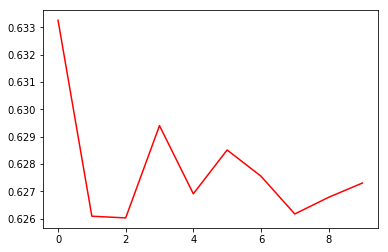

In [31]:
class_weight = {
    0: stat[0]/stat[1],
    1: 1.
}

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [32]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [33]:
test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:22<00:00,  1.11s/it]

Avgerage Training Accuracy: 0.5459363958650257
Avgerage Testing Accuracy: 0.5198412703143227


## Discussion

## How did you preprocess this dataset ?
### 由於要預測隔天股票是否上漲, 因此逐一比較當天與隔天收盤價的變化, 若隔天上漲就記為 1, 否則記為 0.
### 由於資料譯開始就以照時間排序, 因此去除時間資料

## Which classifier reaches the highest classification accuracy in this dataset ?
### 看起來三種分類器皆得到相近的結果, 用來訓練的資料的準確度約為 0.54 而用於測試的資料準確度約為 0.51
### 可能原始資料與要預測的結果間關聯不大或是還存在其他更關鍵的因素, 使得模型難以提高準確度

## How did you improve your classifiers ?
### 嘗試使用不同的參數, 然而對結果的影響極小